In [1]:
# Project Template Import Cell
%matplotlib inline
import os
import sys
import math

from __future__ import print_function, division
from inspect import getsourcefile

from IPython.display import FileLink

# Standard Notebook Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

CURR_PATH = os.path.abspath(getsourcefile(lambda:0)).rsplit('/', 1)[0] # Get filepath of this notebook
module_path = os.path.join(os.path.dirname(CURR_PATH), 'utils') # Make module path for one dir up and one down into utils
if module_path not in sys.path: # Append to system path list
    sys.path.append(module_path)

import utils as utils ; reload(utils)

print('System : Python ', os.sys.version , '\n\n')

print('Directory Structure:')
print(CURR_PATH)
!tree -cn --filelimit 21

# Keras Setup
import keras
print('\n\nKeras version:' , keras.__version__ ,
      ', backend:' , keras.backend.backend(),
      ', image_format:' , keras.backend.image_data_format())

random_seed = 7

print('\n\nEnvironment : ')
FileLink('../../ana_py27_p2.yml')

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


System : Python  2.7.12 | packaged by conda-forge | (default, Sep  8 2016, 14:22:31) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)] 


Directory Structure:
/home/ubuntu/ana_py27_p2/projects/CervicalCancer
.
├── unused_utils
│   ├── __init__.py
│   ├── __init__.pyc
│   ├── utils.pyc
│   └── unused_utils.py
├── __init__.py
├── 001 - Initial Setup.ipynb
├── 002 - Data Setup & General Notes.ipynb
├── 003 - Baseline.ipynb
├── Trash
│   ├── 002-01 - Train Data (only) Setup.ipynb
│   └── Base CNN Model Train Data with Preprocessing.ipynb
├── 004-1 - Base CNN Model - Sample.ipynb
├── 004-2 - Base CNN Model - Train Data.ipynb
├── 005 - Exploratoring the Data.ipynb
├── 006 - Non Neural Net Classifiers.ipynb
├── 007 - Gradient Boosting Classifier.ipynb
├── data
│   ├── additional_Type_1_v2.7z
│   ├── additional_Type_3_v2.7z
│   ├── additional_Type_2_v2.7z
│   ├── train
│   │   ├── Type_1 [168 entries exceeds filelimit, not opening dir]
│   │   ├── Type_2 [524 entries exceeds filelimit, not opening dir]

/home/ubuntu/ana_py27_p2/ana_py27_p2.yml

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [3]:
# A fix for truncated image error
# http://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Prepare Data

In [4]:
img_width, img_height = 224, 224
#img_width, img_height = 300, 300

In [5]:
# !!!SAMPLE
train_data_dir = 'data/sample/train'
validation_data_dir = 'data/sample/valid'
test_data_dir = 'data/sample/test'
weights_dir = 'data/sample/weights'

# !!!TRAIN
#train_data_dir = 'data/train'
#validation_data_dir = 'data/valid'
#test_data_dir = 'data/test'
#weights_dir = 'data/weights'
#submission_dir = 'data/submissions'

num_training_samples = 0
for class_dir in utils.get_non_hidden_dir_contents(train_data_dir):
    num_training_samples += len(utils.get_non_hidden_dir_contents(class_dir))
num_validation_samples = 0
for class_dir in utils.get_non_hidden_dir_contents(validation_data_dir):
    num_validation_samples += len(utils.get_non_hidden_dir_contents(class_dir))    

print(num_training_samples)
print(num_validation_samples)

473
362


In [6]:
# !!!SAMPLE
epochs = 5
batch_size=64

# !!!TRAIN
#epochs=5
#batch_size=64

input_shape = (img_width, img_height, 3)

train_steps = int(math.ceil(num_training_samples / batch_size))
validation_steps =  int(math.ceil(num_validation_samples / batch_size))
print(train_steps)
print(validation_steps)
class_weight_dict = utils.get_class_weight_dict([35, 106, 62])

8
6


In [7]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()#,

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

Found 473 images belonging to 3 classes.
Found 362 images belonging to 3 classes.


### Linear Model

In [8]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(img_width,img_height,3)),
        Flatten(),
        Dense(3, activation='softmax')
    ])
utils.show_ascii_model(model)

          InputLayer (None, 224, 224, 3) 
  BatchNormalization (None, 224, 224, 3) 
             Flatten (None, 150528)      
               Dense (None, 3)           



In [9]:
model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Epoch 1/5
8/8 [==============================] - 192s - loss: 14.2101 - acc: 0.3286 - val_loss: 7.6583 - val_acc: 0.5249
Epoch 2/5
8/8 [==============================] - 100s - loss: 15.0727 - acc: 0.4104 - val_loss: 7.6138 - val_acc: 0.5276
Epoch 3/5
8/8 [==============================] - 98s - loss: 14.9934 - acc: 0.4208 - val_loss: 7.8364 - val_acc: 0.5138
Epoch 4/5
8/8 [==============================] - 102s - loss: 15.0367 - acc: 0.4127 - val_loss: 7.5247 - val_acc: 0.5331
Epoch 5/5
8/8 [==============================] - 99s - loss: 15.0724 - acc: 0.4087 - val_loss: 7.3912 - val_acc: 0.5414


In [10]:
#Going nowhere fast - Drop learning rate by factor of 10
model.optimizer.lr=0.0001 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Epoch 1/3
8/8 [==============================] - 183s - loss: 14.1728 - acc: 0.4656 - val_loss: 7.7919 - val_acc: 0.5166
Epoch 2/3
8/8 [==============================] - 103s - loss: 15.7760 - acc: 0.4812 - val_loss: 7.6583 - val_acc: 0.5249
Epoch 3/3
8/8 [==============================] - 99s - loss: 13.7169 - acc: 0.5277 - val_loss: 7.6583 - val_acc: 0.5249


In [12]:
#Maybe climbing - keep going
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Epoch 1/3
8/8 [==============================] - 183s - loss: 14.8897 - acc: 0.4292 - val_loss: 7.8583 - val_acc: 0.5110
Epoch 2/3
8/8 [==============================] - 104s - loss: 15.2683 - acc: 0.4087 - val_loss: 7.8813 - val_acc: 0.5110
Epoch 3/3
8/8 [==============================] - 100s - loss: 15.5278 - acc: 0.4001 - val_loss: 7.9255 - val_acc: 0.5083


In [13]:
#Dead as a Dodo Drop learning rate again
model.optimizer.lr=0.000001 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Epoch 1/5
8/8 [==============================] - 186s - loss: 14.7036 - acc: 0.4316 - val_loss: 8.1893 - val_acc: 0.4917
Epoch 2/5
8/8 [==============================] - 100s - loss: 15.2881 - acc: 0.4383 - val_loss: 8.0664 - val_acc: 0.4972
Epoch 3/5
8/8 [==============================] - 99s - loss: 13.8704 - acc: 0.4775 - val_loss: 8.7065 - val_acc: 0.4586
Epoch 4/5
8/8 [==============================] - 94s - loss: 15.1977 - acc: 0.4376 - val_loss: 7.9702 - val_acc: 0.5055
Epoch 5/5
8/8 [==============================] - 121s - loss: 13.6283 - acc: 0.4797 - val_loss: 8.3368 - val_acc: 0.4807


In [14]:
# Maybe Learning, incredibly but slow - lift learning rate by factor of 10
model.optimizer.lr=0.00001 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Epoch 1/5
8/8 [==============================] - 191s - loss: 14.0416 - acc: 0.4637 - val_loss: 8.1630 - val_acc: 0.4890
Epoch 2/5
7/8 [=========================>....] - ETA: 0s - loss: 16.0218 - acc: 0.3872

KeyboardInterrupt: 

In [ ]:
# Cannot seem to get this to learn
# Try a simple CNN

In [16]:
# Getting nowhere - Try Simple Conv

In [15]:
# Start
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()#,

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=1)

Found 473 images belonging to 3 classes.
Found 362 images belonging to 3 classes.
Epoch 1/5
8/8 [==============================] - 192s - loss: 3.6882 - acc: 0.3619 - val_loss: 7.6031 - val_acc: 0.4392
Epoch 2/5
8/8 [==============================] - 112s - loss: 1.3366 - acc: 0.5610 - val_loss: 5.4173 - val_acc: 0.4558
Epoch 3/5
8/8 [==============================] - 113s - loss: 1.0845 - acc: 0.6433 - val_loss: 3.5986 - val_acc: 0.4365
Epoch 4/5
8/8 [==============================] - 116s - loss: 0.9981 - acc: 0.7260 - val_loss: 2.7605 - val_acc: 0.4448
Epoch 5/5
8/8 [==============================] - 104s - loss: 0.9108 - acc: 0.7517 - val_loss: 2.5049 - val_acc: 0.3453


In [18]:
# Model has learning capability lr seems OK - but is overfitting
# Try some augmentation & assess impact on oos learning

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.

Channel Shift Range : 5
Epoch 1/8
8/8 [==============================] - 191s - loss: 4.4223 - acc: 0.3831 - val_loss: 7.6264 - val_acc: 0.5249
Epoch 2/8
8/8 [==============================] - 116s - loss: 1.5732 - acc: 0.5413 - val_loss: 9.3468 - val_acc: 0.1657
Epoch 3/8
8/8 [==============================] - 112s - loss: 1.0860 - acc: 0.6568 - val_loss: 5.0456 - val_acc: 0.2044
Epoch 4/8
8/8 [==============================] - 112s - loss: 0.9470 - acc: 0.6775 - val_loss: 2.8801 - val_acc: 0.2624
Epoch 5/8
8/8 [==============================] - 104s - loss: 0.8287 - acc: 0.7487 - val_loss: 1.8604 - val_acc: 0.3729
Epoch 6/8
8/8 [==============================] - 113s - loss: 0.6837 - acc: 0.8123 - val_loss: 1.6430 - val_acc: 0.3646
Epoch 7/8
8/8 [==============================] - 112s - loss: 0.5639 - acc: 0.8389 - val_loss: 1.2743 - val_acc: 0.4144
Epoch 8/8
8/8 [==============================] - 120s

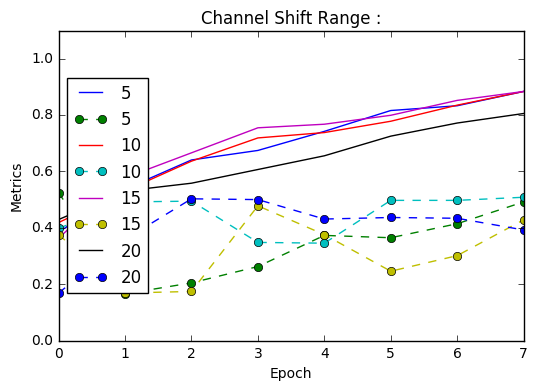

In [16]:
# CHANNEL SHIFTS
channel_shift_ranges = [5,10,15,20]
epochs=8
verbose=1

train_acc = {}
val_acc = {}

for channel_shift_range in channel_shift_ranges:
    test_datagen = ImageDataGenerator()#,
    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
    model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    train_datagen = ImageDataGenerator(channel_shift_range=channel_shift_range)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    print('\nChannel Shift Range :',channel_shift_range)
    h = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps, 
        class_weight = class_weight_dict,
        #callbacks=callbacks_list,
        verbose=verbose)
    train_acc[channel_shift_range] = h.history[h.params['metrics'][1]]
    val_acc[channel_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
for channel_shift_range in channel_shift_ranges:
    plt.plot(epochs, train_acc[channel_shift_range], label = str(channel_shift_range))
    plt.plot(epochs, val_acc[channel_shift_range], marker='o', linestyle='--',label= str(channel_shift_range))
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Channel Shift Range :')
plt.legend(loc='center left')
plt.show;

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.

Channel Shift Range : 5
Epoch 1/15
8/8 [==============================] - 192s - loss: 3.3957 - acc: 0.3580 - val_loss: 4.4973 - val_acc: 0.2293
Epoch 2/15
8/8 [==============================] - 107s - loss: 1.3519 - acc: 0.5580 - val_loss: 2.7463 - val_acc: 0.1740
Epoch 3/15
8/8 [==============================] - 109s - loss: 1.1456 - acc: 0.6312 - val_loss: 1.8804 - val_acc: 0.1575
Epoch 4/15
8/8 [==============================] - 128s - loss: 1.0134 - acc: 0.6834 - val_loss: 1.7882 - val_acc: 0.1906
Epoch 5/15
8/8 [==============================] - 109s - loss: 0.8759 - acc: 0.7586 - val_loss: 2.3375 - val_acc: 0.2956
Epoch 6/15
8/8 [==============================] - 100s - loss: 0.7673 - acc: 0.8009 - val_loss: 1.6009 - val_acc: 0.4282
Epoch 7/15
8/8 [==============================] - 110s - loss: 0.6001 - acc: 0.8421 - val_loss: 1.2878 - val_acc: 0.4945
Epoch 8/15
8/8 [==============================

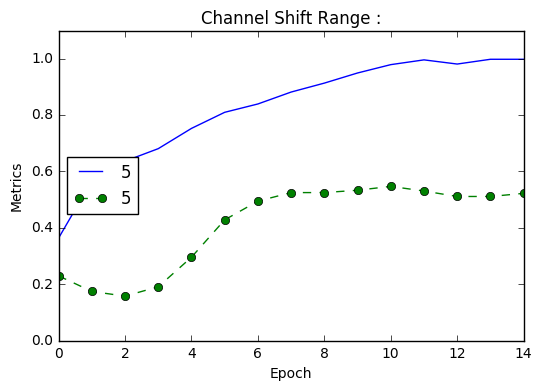

In [17]:
# TRY and learn with best learning channel shift
channel_shift_ranges = [5]
epochs=15
verbose=1

train_acc = {}
val_acc = {}

for channel_shift_range in channel_shift_ranges:
    test_datagen = ImageDataGenerator()#,
    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
    model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    train_datagen = ImageDataGenerator(channel_shift_range=channel_shift_range)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    print('\nChannel Shift Range :',channel_shift_range)
    h = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps, 
        class_weight = class_weight_dict,
        #callbacks=callbacks_list,
        verbose=verbose)
    train_acc[channel_shift_range] = h.history[h.params['metrics'][1]]
    val_acc[channel_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
for channel_shift_range in channel_shift_ranges:
    plt.plot(epochs, train_acc[channel_shift_range], label = str(channel_shift_range))
    plt.plot(epochs, val_acc[channel_shift_range], marker='o', linestyle='--',label= str(channel_shift_range))
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Channel Shift Range :')
plt.legend(loc='center left')
plt.show;

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.
Epoch 1/15
8/8 [==============================] - 201s - loss: 2.4338 - acc: 0.3508 - val_loss: 1.6433 - val_acc: 0.2017
Epoch 2/15
8/8 [==============================] - 104s - loss: 1.9386 - acc: 0.3915 - val_loss: 1.4352 - val_acc: 0.2155
Epoch 3/15
8/8 [==============================] - 111s - loss: 1.6352 - acc: 0.4898 - val_loss: 1.3954 - val_acc: 0.2569
Epoch 4/15
8/8 [==============================] - 105s - loss: 1.5004 - acc: 0.5174 - val_loss: 1.3111 - val_acc: 0.2652
Epoch 5/15
8/8 [==============================] - 103s - loss: 1.4400 - acc: 0.5319 - val_loss: 1.2595 - val_acc: 0.2735
Epoch 6/15
8/8 [==============================] - 98s - loss: 1.3836 - acc: 0.5568 - val_loss: 1.2047 - val_acc: 0.3453
Epoch 7/15
8/8 [==============================] - 140s - loss: 1.3004 - acc: 0.6135 - val_loss: 1.1115 - val_acc: 0.3895
Epoch 8/15
8/8 [==============================] - 146s - loss: 1.1253 - 

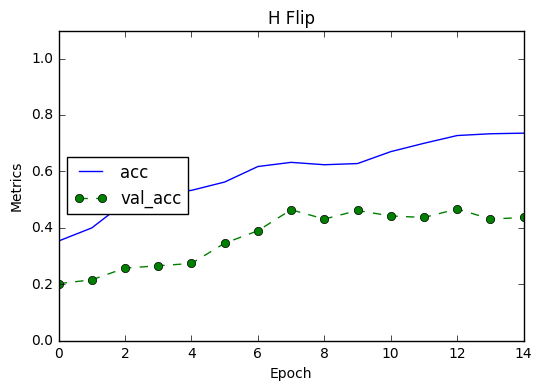

In [25]:
# HORIZONTAL & VERTICAL FLIPFLIP
epochs=15
verbose=1

train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])

model.compile(optimizers.Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('H Flip')
plt.legend(loc='center left')
plt.show;

In [26]:
model.optimizer.lr=0.0001 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

Epoch 1/5
8/8 [==============================] - 203s - loss: 0.8124 - acc: 0.7477 - val_loss: 1.0741 - val_acc: 0.4033
Epoch 2/5
8/8 [==============================] - 118s - loss: 0.7823 - acc: 0.7731 - val_loss: 1.0646 - val_acc: 0.4392
Epoch 3/5
8/8 [==============================] - 102s - loss: 0.8037 - acc: 0.7352 - val_loss: 1.0789 - val_acc: 0.4365
Epoch 4/5
8/8 [==============================] - 106s - loss: 0.7226 - acc: 0.8071 - val_loss: 1.0665 - val_acc: 0.4448
Epoch 5/5
8/8 [==============================] - 105s - loss: 0.7985 - acc: 0.7625 - val_loss: 1.0857 - val_acc: 0.4144


In [ ]:
# HORIZONTAL & VERTICAL FLIP
epochs=15
verbose=1

train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])

model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('H Flip')
plt.legend(loc='center left')
plt.show;

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.
Epoch 1/15
8/8 [==============================] - 192s - loss: 4.5058 - acc: 0.3966 - val_loss: 6.6693 - val_acc: 0.5083
Epoch 2/15
8/8 [==============================] - 110s - loss: 1.7973 - acc: 0.4935 - val_loss: 9.9881 - val_acc: 0.1713
Epoch 3/15
8/8 [==============================] - 110s - loss: 1.4141 - acc: 0.5248 - val_loss: 7.6798 - val_acc: 0.1519
Epoch 4/15
8/8 [==============================] - 109s - loss: 1.2255 - acc: 0.6088 - val_loss: 3.0061 - val_acc: 0.2403
Epoch 5/15
8/8 [==============================] - 103s - loss: 1.2441 - acc: 0.6016 - val_loss: 2.1460 - val_acc: 0.3508
Epoch 6/15
8/8 [==============================] - 109s - loss: 1.0912 - acc: 0.6834 - val_loss: 2.2126 - val_acc: 0.1878
Epoch 7/15
8/8 [==============================] - 103s - loss: 1.0483 - acc: 0.6704 - val_loss: 1.9710 - val_acc: 0.1657
Epoch 8/15
8/8 [==============================] - 110s - loss: 1.0058 -

In [20]:
# WIDTH SHIFTS
width_shift_ranges = [0.025,0.05,0.075,0.1]
epochs=8
verbose=1

train_acc = {}
val_acc = {}

for width_shift_range in width_shift_ranges:
    test_datagen = ImageDataGenerator()#,
    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
    model.compile(optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    train_datagen = ImageDataGenerator(width_shift_range=width_shift_range)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    print('\nWidth Shift Range :',width_shift_range)
    h = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps, 
        class_weight = class_weight_dict,
        #callbacks=callbacks_list,
        verbose=verbose)
    train_acc[width_shift_range] = h.history[h.params['metrics'][1]]
    val_acc[width_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
for width_shift_range in width_shift_ranges:
    plt.plot(epochs, train_acc[width_shift_range], label = str(width_shift_range))
    plt.plot(epochs, val_acc[width_shift_range], marker='o', linestyle='--',label= str(width_shift_range))
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Width Shift Range :')
plt.legend(loc='center left')
plt.show;

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.

Width Shift Range : 0.025
Epoch 1/8
8/8 [==============================] - 194s - loss: 2.2623 - acc: 0.3673 - val_loss: 2.4605 - val_acc: 0.1878
Epoch 2/8
8/8 [==============================] - 117s - loss: 1.4880 - acc: 0.5216 - val_loss: 1.9233 - val_acc: 0.1547
Epoch 3/8
8/8 [==============================] - 108s - loss: 1.1577 - acc: 0.6189 - val_loss: 1.6093 - val_acc: 0.1713
Epoch 4/8
8/8 [==============================] - 116s - loss: 0.9687 - acc: 0.6965 - val_loss: 1.4265 - val_acc: 0.2099
Epoch 5/8
8/8 [==============================] - 103s - loss: 0.7760 - acc: 0.7689 - val_loss: 1.2826 - val_acc: 0.2956
Epoch 6/8
8/8 [==============================] - 105s - loss: 0.6892 - acc: 0.8017 - val_loss: 1.1586 - val_acc: 0.3122
Epoch 7/8
8/8 [==============================] - 111s - loss: 0.5970 - acc: 0.8495 - val_loss: 1.1366 - val_acc: 0.3508
Epoch 8/8
8/8 [==============================] - 11

KeyboardInterrupt: 

In [21]:
# HEIGHT SHIFTS
height_shift_ranges = [0.025,0.05,0.075,0.1]
epochs=8
verbose=1

train_acc = {}
val_acc = {}
                          #height_shift_ranges
for height_shift_range in height_shift_ranges:
    test_datagen = ImageDataGenerator()#,
    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
    model.compile(optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    train_datagen = ImageDataGenerator(height_shift_range=height_shift_range)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    print('\nHeight Shift Range :',height_shift_range)
    h = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps, 
        class_weight = class_weight_dict,
        #callbacks=callbacks_list,
        verbose=verbose)
    train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
    val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
for height_shift_range in height_shift_ranges:
    plt.plot(epochs, train_acc[height_shift_range], label = str(height_shift_range))
    plt.plot(epochs, val_acc[height_shift_range], marker='o', linestyle='--',label= str(height_shift_range))
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Height Shift Range :')
plt.legend(loc='center left')
plt.show;

Found 362 images belonging to 3 classes.
Found 473 images belonging to 3 classes.

Height Shift Range : 0.025
Epoch 1/8
8/8 [==============================] - 192s - loss: 2.4090 - acc: 0.3370 - val_loss: 3.0389 - val_acc: 0.1740
Epoch 2/8
8/8 [==============================] - 112s - loss: 1.5428 - acc: 0.4846 - val_loss: 1.7357 - val_acc: 0.2265
Epoch 3/8
8/8 [==============================] - 136s - loss: 1.3175 - acc: 0.6041 - val_loss: 1.6672 - val_acc: 0.2182
Epoch 4/8
8/8 [==============================] - 123s - loss: 1.0338 - acc: 0.6699 - val_loss: 1.4702 - val_acc: 0.2762
Epoch 5/8
8/8 [==============================] - 113s - loss: 0.8912 - acc: 0.6768 - val_loss: 1.1850 - val_acc: 0.4503
Epoch 6/8
8/8 [==============================] - 99s - loss: 0.7934 - acc: 0.7499 - val_loss: 1.2155 - val_acc: 0.3591
Epoch 7/8
8/8 [==============================] - 123s - loss: 0.7272 - acc: 0.7911 - val_loss: 1.1597 - val_acc: 0.3425
Epoch 8/8
7/8 [=========================>....] - ET

KeyboardInterrupt: 

In [ ]:
# HEIGHT SHIFTS
height_shift_ranges = [0.025,0.05,0.075,0.1]
epochs=8
verbose=1

train_acc = {}
val_acc = {}
                          #height_shift_ranges
for height_shift_range in height_shift_ranges:
    test_datagen = ImageDataGenerator()#,
    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
        Conv2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(3, activation='softmax')
        ])
    model.compile(optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    train_datagen = ImageDataGenerator(height_shift_range=height_shift_range)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        classes = ['Type_1', 'Type_2', 'Type_3'],
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')
    print('\nHeight Shift Range :',height_shift_range)
    h = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps, 
        class_weight = class_weight_dict,
        #callbacks=callbacks_list,
        verbose=verbose)
    train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
    val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
for height_shift_range in height_shift_ranges:
    plt.plot(epochs, train_acc[height_shift_range], label = str(height_shift_range))
    plt.plot(epochs, val_acc[height_shift_range], marker='o', linestyle='--',label= str(height_shift_range))
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Height Shift Range :')
plt.legend(loc='center left')
plt.show;

In [ ]:
stop

Found 73 images belonging to 3 classes.
Found 203 images belonging to 3 classes.

Height Shift Range : 0.05
Epoch 1/3
9/9 [==============================] - 113s - loss: 2.5189 - acc: 0.2920 - val_loss: 1.0157 - val_acc: 0.5616
Epoch 2/3
9/9 [==============================] - 95s - loss: 1.8343 - acc: 0.3998 - val_loss: 0.9596 - val_acc: 0.5616
Epoch 3/3
9/9 [==============================] - 91s - loss: 1.8419 - acc: 0.4223 - val_loss: 1.0288 - val_acc: 0.4521


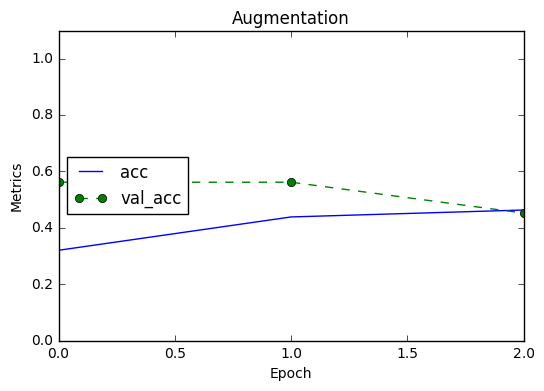

In [24]:
# HEIGHT SHIFTS

# Just made it to 0.9 - could probably grab a bit more, but deal with generalization
# Augmentation to lift oos learning
# Common setup
channel_shift_range=5
width_shift_range=0.05
height_shift_range=0.05

epochs=3
verbose=1


train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])
model.compile(optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(channel_shift_range=channel_shift_range,
                                   width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)
train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Augmentation')
plt.legend(loc='center left')
plt.show;

In [26]:
model.optimizer.lr=1e-6 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/3
9/9 [==============================] - 111s - loss: 1.4397 - acc: 0.5325 - val_loss: 0.9426 - val_acc: 0.5342
Epoch 2/3
9/9 [==============================] - 94s - loss: 1.1378 - acc: 0.6068 - val_loss: 0.9448 - val_acc: 0.5479
Epoch 3/3
9/9 [==============================] - 96s - loss: 1.3998 - acc: 0.5975 - val_loss: 0.9756 - val_acc: 0.5068


In [27]:
 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/3
9/9 [==============================] - 118s - loss: 0.9847 - acc: 0.6472 - val_loss: 0.9888 - val_acc: 0.5068
Epoch 2/3
9/9 [==============================] - 97s - loss: 1.1493 - acc: 0.6583 - val_loss: 1.0112 - val_acc: 0.4795
Epoch 3/3
9/9 [==============================] - 97s - loss: 0.9963 - acc: 0.6697 - val_loss: 1.0612 - val_acc: 0.4521


In [28]:
model.optimizer.lr=1e-7 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/3
9/9 [==============================] - 119s - loss: 0.8642 - acc: 0.6559 - val_loss: 1.0502 - val_acc: 0.4247
Epoch 2/3
9/9 [==============================] - 94s - loss: 0.9079 - acc: 0.7775 - val_loss: 1.1641 - val_acc: 0.2740
Epoch 3/3
9/9 [==============================] - 92s - loss: 0.8049 - acc: 0.6987 - val_loss: 1.1058 - val_acc: 0.2877


In [29]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/5
9/9 [==============================] - 116s - loss: 0.7399 - acc: 0.7167 - val_loss: 1.1188 - val_acc: 0.3288
Epoch 2/5
9/9 [==============================] - 94s - loss: 0.7766 - acc: 0.7661 - val_loss: 1.0964 - val_acc: 0.3562
Epoch 3/5
9/9 [==============================] - 96s - loss: 0.6777 - acc: 0.7820 - val_loss: 1.1841 - val_acc: 0.2877
Epoch 4/5
9/9 [==============================] - 94s - loss: 0.6308 - acc: 0.8203 - val_loss: 1.1599 - val_acc: 0.3014
Epoch 5/5
9/9 [==============================] - 98s - loss: 0.6872 - acc: 0.7751 - val_loss: 1.1602 - val_acc: 0.3151


In [30]:
model.optimizer.lr=0.001 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/5
9/9 [==============================] - 118s - loss: 0.6161 - acc: 0.8449 - val_loss: 1.0909 - val_acc: 0.3425
Epoch 2/5
9/9 [==============================] - 95s - loss: 0.6838 - acc: 0.8089 - val_loss: 1.1007 - val_acc: 0.3699
Epoch 3/5
9/9 [==============================] - 97s - loss: 0.7079 - acc: 0.8179 - val_loss: 1.1368 - val_acc: 0.3562
Epoch 4/5
9/9 [==============================] - 95s - loss: 0.6777 - acc: 0.7637 - val_loss: 1.1408 - val_acc: 0.3836
Epoch 5/5
9/9 [==============================] - 92s - loss: 0.6260 - acc: 0.8066 - val_loss: 1.1581 - val_acc: 0.3699


In [31]:
model.optimizer.lr=0.01 # Default 0.001
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/5
9/9 [==============================] - 119s - loss: 0.6605 - acc: 0.7727 - val_loss: 1.1790 - val_acc: 0.3288
Epoch 2/5
9/9 [==============================] - 95s - loss: 0.5928 - acc: 0.8066 - val_loss: 1.1960 - val_acc: 0.3014
Epoch 3/5
9/9 [==============================] - 100s - loss: 0.4683 - acc: 0.8922 - val_loss: 1.1791 - val_acc: 0.3836
Epoch 4/5
9/9 [==============================] - 95s - loss: 0.5481 - acc: 0.8066 - val_loss: 1.2270 - val_acc: 0.3836
Epoch 5/5
9/9 [==============================] - 93s - loss: 0.4430 - acc: 0.8763 - val_loss: 1.1190 - val_acc: 0.4110


In [32]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    verbose=verbose)

Epoch 1/5
9/9 [==============================] - 119s - loss: 0.4981 - acc: 0.8449 - val_loss: 1.1886 - val_acc: 0.3425
Epoch 2/5
9/9 [==============================] - 100s - loss: 0.5688 - acc: 0.8560 - val_loss: 1.2298 - val_acc: 0.2740
Epoch 3/5
9/9 [==============================] - 97s - loss: 0.4728 - acc: 0.9101 - val_loss: 1.1407 - val_acc: 0.3836
Epoch 4/5
9/9 [==============================] - 100s - loss: 0.5657 - acc: 0.8628 - val_loss: 1.2041 - val_acc: 0.3699
Epoch 5/5
9/9 [==============================] - 94s - loss: 0.4055 - acc: 0.9012 - val_loss: 1.1399 - val_acc: 0.4384


Found 73 images belonging to 3 classes.
Found 203 images belonging to 3 classes.
Epoch 1/5
9/9 [==============================] - 110s - loss: 2.6555 - acc: 0.2719 - val_loss: 3.2171 - val_acc: 0.3014
Epoch 2/5
9/9 [==============================] - 93s - loss: 2.3349 - acc: 0.3282 - val_loss: 2.1413 - val_acc: 0.2877
Epoch 3/5
9/9 [==============================] - 88s - loss: 2.2413 - acc: 0.3573 - val_loss: 1.5102 - val_acc: 0.3151
Epoch 4/5
9/9 [==============================] - 89s - loss: 2.1922 - acc: 0.3956 - val_loss: 1.2713 - val_acc: 0.3014
Epoch 5/5
9/9 [==============================] - 89s - loss: 2.0821 - acc: 0.3325 - val_loss: 1.1379 - val_acc: 0.3288


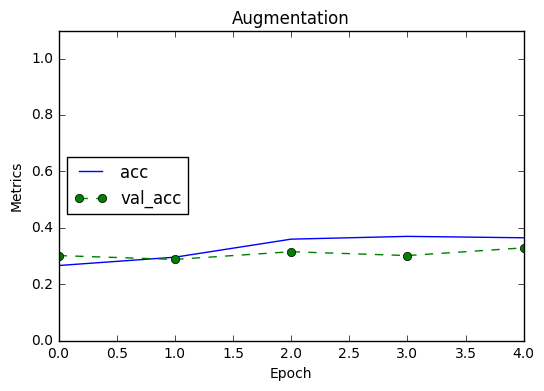

In [41]:
# HEIGHT SHIFTS

# Just made it to 0.9 - could probably grab a bit more, but deal with generalization
# Augmentation to lift oos learning
# Common setup
#channel_shift_range=5
width_shift_range=0.025
height_shift_range=0.025

epochs=3
verbose=1


train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])
model.compile(optimizers.Adam(lr=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)
train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Augmentation')
plt.legend(loc='center left')
plt.show;

In [42]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

Epoch 1/10
9/9 [==============================] - 110s - loss: 2.0561 - acc: 0.3663 - val_loss: 1.0936 - val_acc: 0.3288
Epoch 2/10
9/9 [==============================] - 95s - loss: 2.3076 - acc: 0.3438 - val_loss: 1.0398 - val_acc: 0.4110
Epoch 3/10
9/9 [==============================] - 95s - loss: 1.9243 - acc: 0.4226 - val_loss: 1.0201 - val_acc: 0.5205
Epoch 4/10
9/9 [==============================] - 98s - loss: 1.8419 - acc: 0.4178 - val_loss: 1.0198 - val_acc: 0.4932
Epoch 5/10
9/9 [==============================] - 97s - loss: 1.9507 - acc: 0.3774 - val_loss: 1.0351 - val_acc: 0.5342
Epoch 6/10
9/9 [==============================] - 94s - loss: 1.8117 - acc: 0.4675 - val_loss: 1.0312 - val_acc: 0.5342
Epoch 7/10
9/9 [==============================] - 89s - loss: 1.7537 - acc: 0.4067 - val_loss: 1.0360 - val_acc: 0.5205
Epoch 8/10
9/9 [==============================] - 93s - loss: 1.6536 - acc: 0.5079 - val_loss: 1.0696 - val_acc: 0.4795
Epoch 9/10
9/9 [=======================

In [43]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

Epoch 1/25
9/9 [==============================] - 111s - loss: 1.6609 - acc: 0.4921 - val_loss: 1.0999 - val_acc: 0.4795
Epoch 2/25
9/9 [==============================] - 89s - loss: 1.3867 - acc: 0.5235 - val_loss: 1.1379 - val_acc: 0.4247
Epoch 3/25
9/9 [==============================] - 85s - loss: 1.4229 - acc: 0.4876 - val_loss: 1.0314 - val_acc: 0.5753
Epoch 4/25
9/9 [==============================] - 87s - loss: 1.4928 - acc: 0.5304 - val_loss: 1.1306 - val_acc: 0.4658
Epoch 5/25
9/9 [==============================] - 87s - loss: 1.3997 - acc: 0.5753 - val_loss: 1.1734 - val_acc: 0.4795
Epoch 6/25
9/9 [==============================] - 87s - loss: 1.2905 - acc: 0.5957 - val_loss: 1.2576 - val_acc: 0.3425
Epoch 7/25
9/9 [==============================] - 87s - loss: 1.3280 - acc: 0.6158 - val_loss: 1.1513 - val_acc: 0.4658
Epoch 8/25
9/9 [==============================] - 87s - loss: 1.3586 - acc: 0.5909 - val_loss: 1.1000 - val_acc: 0.4932
Epoch 9/25
9/9 [=======================

Found 73 images belonging to 3 classes.
Found 203 images belonging to 3 classes.
Epoch 1/5
9/9 [==============================] - 118s - loss: 2.5779 - acc: 0.3169 - val_loss: 1.5664 - val_acc: 0.3014
Epoch 2/5
9/9 [==============================] - 100s - loss: 1.6790 - acc: 0.4900 - val_loss: 1.2710 - val_acc: 0.3014
Epoch 3/5
9/9 [==============================] - 104s - loss: 1.2701 - acc: 0.5864 - val_loss: 1.3123 - val_acc: 0.3014
Epoch 4/5
9/9 [==============================] - 97s - loss: 0.9775 - acc: 0.6765 - val_loss: 1.3026 - val_acc: 0.2603
Epoch 5/5
9/9 [==============================] - 91s - loss: 1.0134 - acc: 0.7122 - val_loss: 1.2973 - val_acc: 0.2055


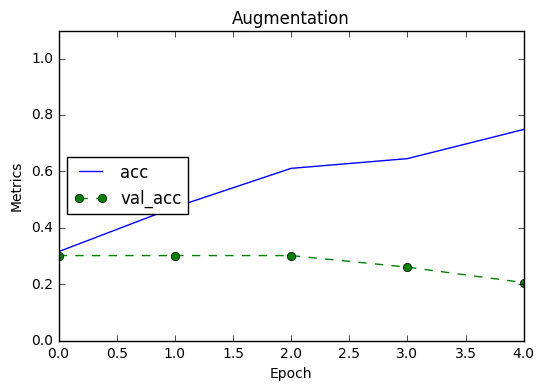

In [13]:
# HEIGHT SHIFTS

# Just made it to 0.9 - could probably grab a bit more, but deal with generalization
# Augmentation to lift oos learning
# Common setup
channel_shift_range=None
width_shift_range=0.05
height_shift_range=None

epochs=5
verbose=1


train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])

model.compile(optimizers.Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(width_shift_range=width_shift_range)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)
train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Augmentation')
plt.legend(loc='center left')
plt.show;

In [ ]:
model.optimizer.lr=0.00001 # Default 0.001h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)

In [ ]:
#width_shift_range=0.05
#lr=1e-5

In [ ]:
# HEIGHT SHIFTS

# Just made it to 0.9 - could probably grab a bit more, but deal with generalization
# Augmentation to lift oos learning
# Common setup
def proprocessing_function(img):
    image1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1    

channel_shift_range=None
width_shift_range=None
height_shift_range=None

epochs=5
verbose=1


train_acc = {}
val_acc = {}

test_datagen = ImageDataGenerator()#,
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
model = Sequential([
    BatchNormalization(axis=1, input_shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
    ])
model.compile(optimizers.Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(preprocessing_function= proprocessing_function)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    #callbacks=callbacks_list,
    verbose=verbose)
train_acc[height_shift_range] = h.history[h.params['metrics'][1]]
val_acc[height_shift_range] = h.history[h.params['metrics'][3]]

# Graphs
epochs = h.epoch
plt.plot(epochs, h.history[h.params['metrics'][1]], label = 'acc')
plt.plot(epochs, h.history[h.params['metrics'][3]], marker='o', linestyle='--',label= 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0,1.1])
plt.title('Augmentation')
plt.legend(loc='center left')
plt.show;

In [ ]:
stop

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# Dropout reduced from 0.5 on home pc to 0.1 to try and improve training
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
            metrics=['accuracy'])

In [ ]:
# checkpoint
# http://machinelearningmastery.com/check-point-deep-learning-models-keras/
filen="weights2-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath = os.path.join(weights_dir, filen)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# !!! TRAIN
#callbacks_list = [checkpoint]
callbacks_list=None

In [ ]:
##### TEST WITH A COUPLE OF IMAGES  AND SHOW TEST RESULTS##########


import cv2
import PIL
#import PIL.Image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
# Preprocessing Function Docs from Image Preprocessing
# preprocessing_function: function that will be implied on each input. 
# The function will run before any other modification on it. 
# The function should take one argument: one image (Numpy tensor with rank 3), 
# and should output a Numpy tensor with the same shape. - Same exact dimensions !?! or just same general shape ??

def pink_cropper(img):
    """
    Accepts an image for pocessing
    Converts image to hsv, crops based on threshold parameter settings
    returns cropped image, as a numpy array
    """
    min_params=(130,85,150) ; max_params = (180,256,256)
    #min_params=(0,1,1) ; max_params = (180,256,256)
    # Convert back into a PIL Image
    pil_img = array_to_img(img)
    # Convert into a cv2 image
    cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    # Convert color space to HSV
    hsv = cv2.cvtColor(cv_img, cv2.COLOR_BGR2HSV)
    # Create mask by applying thresholds
    mask = cv2.inRange(hsv, min_params, max_params)
    i, j = np.where(mask)
    indices=None
    if any(i) or any(j):
        indices = np.meshgrid(np.arange(min(i), max(i) + 1),
                              np.arange(min(j), max(j) + 1),
                              indexing='ij')
    if indices:
        cropped_image = cv_img[indices]
    else:
        cropped_image = cv_img
    # Resize here !!
    resized_image = cv2.resize(cropped_image, (150,150))
    # Convert back to PIL Image
    pil_im = PIL.Image.fromarray(resized_image)
    # Convert back to Keras suitable array
    im = img_to_array(pil_im)
    return im

# Try out function attributes as a means of setting parameters
# The Keras preprocessing function strictly takes only one argument
# This could make the parameters easier to play with
pink_cropper.min_h = 130
pink_cropper.min_s = 85
pink_cropper.min_v = 150

pink_cropper.max_h = 180
pink_cropper.max_s = 256
pink_cropper.max_v = 256


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  preprocessing_function=pink_cropper)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                 preprocessing_function=pink_cropper)

In [ ]:
#train_datagen = ImageDataGenerator(rescale=1. / 255)
#test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    classes = ['Type_1', 'Type_2', 'Type_3'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

In [ ]:
np.round(model.predict_generator(validation_generator,steps=validation_steps)[:10],2)

In [ ]:
# Use this for preliminary timing on the AWS p2 instance, so can estimate a good size for the sample directory files
import time
start_time = time.time()

In [ ]:
# Calculate class weights
# https://groups.google.com/forum/#!topic/keras-users/MUO6v3kRHUw
def get_class_weight_dict(num_per_class_list):
    max_class_num = max(num_per_class_list)
    class_weight_dict ={}
    for n, num in zip(range(0, len(num_per_class_list)), num_per_class_list):
        class_weight_dict[n] = max_class_num / float(num)
    return class_weight_dict
        
# Based on number of training images per Type in sample/train
# !!! SAMPLE
nb_per_class_list = [35,106,62]

# !!! TRAIN
#nb_per_class_list = [168, 524, 302]

class_weight_dict = get_class_weight_dict([35, 106, 62])
print(class_weight_dict)

In [ ]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight = class_weight_dict,
    callbacks=callbacks_list,
    verbose=1)

In [ ]:
# Use this for preliminary timing on the AWS p2 instance, so can estimate a good size for the sample directory files
print("%f seconds" % (time.time() - start_time))
print('Total Images Processed ' , str(num_training_samples + num_validation_samples))
print('Epochs :', str(h.epoch[-1]+ 1))

In [ ]:
utils.plot_learning(h)

In [ ]:
fns = utils.get_non_hidden_dir_contents(os.path.join(test_data_dir, 'unknown'))

pred_gen = ImageDataGenerator(rescale=1. / 255,
                             preprocessing_function=pink_cropper)

# !!! SAMPLE
pred_batch_size= 19
pred_steps=11 # 57 x 9 = 513  #11 x 19 = 209 vs filenames/preds of 201

pred_batch_size= 20
pred_steps=1 # 57 x 9 = 513  #11 x 19 = 209 vs filenames/preds of 201


# !!! TRAIN
#pred_batch_size= 57
#pred_steps=9 # 57 x 9 = 513  #11 x 19 = 209 vs filenames/preds of 201

print('Batch x Steps = ',pred_batch_size * pred_steps , 'Tot Files = ',len(fns))

pred_generator = pred_gen.flow_from_directory(
    test_data_dir,
    shuffle=False,
    classes = ['unknown'],
    target_size=(img_width, img_height),
    batch_size=pred_batch_size,
    color_mode='rgb',
    class_mode='categorical')


In [ ]:
# !!! SAMPLE
preds = model.predict_generator(pred_generator, steps = pred_steps)
filenames = pred_generator.filenames

In [ ]:
# !!! SAMPLE
df = pd.DataFrame(preds)
df['image_name'] = [fn.split('/')[1] for fn in filenames]
df['True_Type'] = [int(fn.split('/')[1].split('_')[0]) for fn in filenames]
#print(df.columns)
df.columns = ['Type_1', 'Type_2','Type_3','image_name','True_Type']
df['Pred_Type'] = df[['Type_1','Type_2','Type_3']].idxmax(axis=1, skipna=True)
df['Pred_Type'] = df['Pred_Type'].apply(lambda x: int(x.split('_')[-1]))
df.columns = ['Type_1','Type_2','Type_3', 'image_name',  'True_Type', 'Pred_Type']
print(df.head(25))

In [ ]:
# !!! SAMPLE
true_y = df['True_Type'].values
pred_y = df['Pred_Type'].values
utils.plot_confusion_matrix(true_y, pred_y, array_labels=[1,2,3])

In [ ]:
utils.plot_response_distribution_known_class(df['Type_1'].values, df['Type_2'].values, df['Type_3'].values)    

In [ ]:
sub_df = utils.form_submission_df(preds, filenames)
#utils.save_submission_csv(submission_dir,sub)
sub_df.head()

In [ ]:
val_res = [model.evaluate_generator(rnd_batches, steps=validation_steps) for i in range(10)]
np.round(val_res, 2)

In [ ]:
np.round(model.predict_generator(validation_generator,steps=validation_steps)[:10],2)